load libraries

In [1]:
from ma_mapper import mapper
from ma_mapper import plots
from ma_mapper import custom_cmap

### Initial Parameters

In [2]:
alignment_filepath = '/rds/project/rds-XrHDlpCeVDg/users/pakkanan/data/output/ma_mapper/hg38_main/alignment/THE1C.fasta.aligned'
genomewide_data_filepath = '/rds/project/rds-XrHDlpCeVDg/users/pakkanan/data/resource/annotation/homer_known_motif_hg38/AP-1(bZIP).bed'

## SIMPLE WORKFLOW

Extract genomewide data into data matrix using coordinates and alignment structure from the alignment file 

In [3]:
output_matrix=mapper.map_and_overlay(alignment_filepath, genomewide_data_filepath,data_format='bed')

2025-03-19 06:18:51,627 INFO: parse alignment
2025-03-19 06:18:58,107 INFO: extract from bed file: /rds/project/rds-XrHDlpCeVDg/users/pakkanan/data/resource/annotation/homer_known_motif_hg38/AP-1(bZIP).bed
2025-03-19 06:19:25,822 INFO: done, returning bed_out as object
2025-03-19 06:19:26,057 INFO: {<class 'numpy.float64'>}
2025-03-19 06:19:26,058 INFO: nested_data:False


In [4]:
output_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Output matrix can be used for downstream analyses or visualization. this package also includes visualization helper function (matplotlib helper)

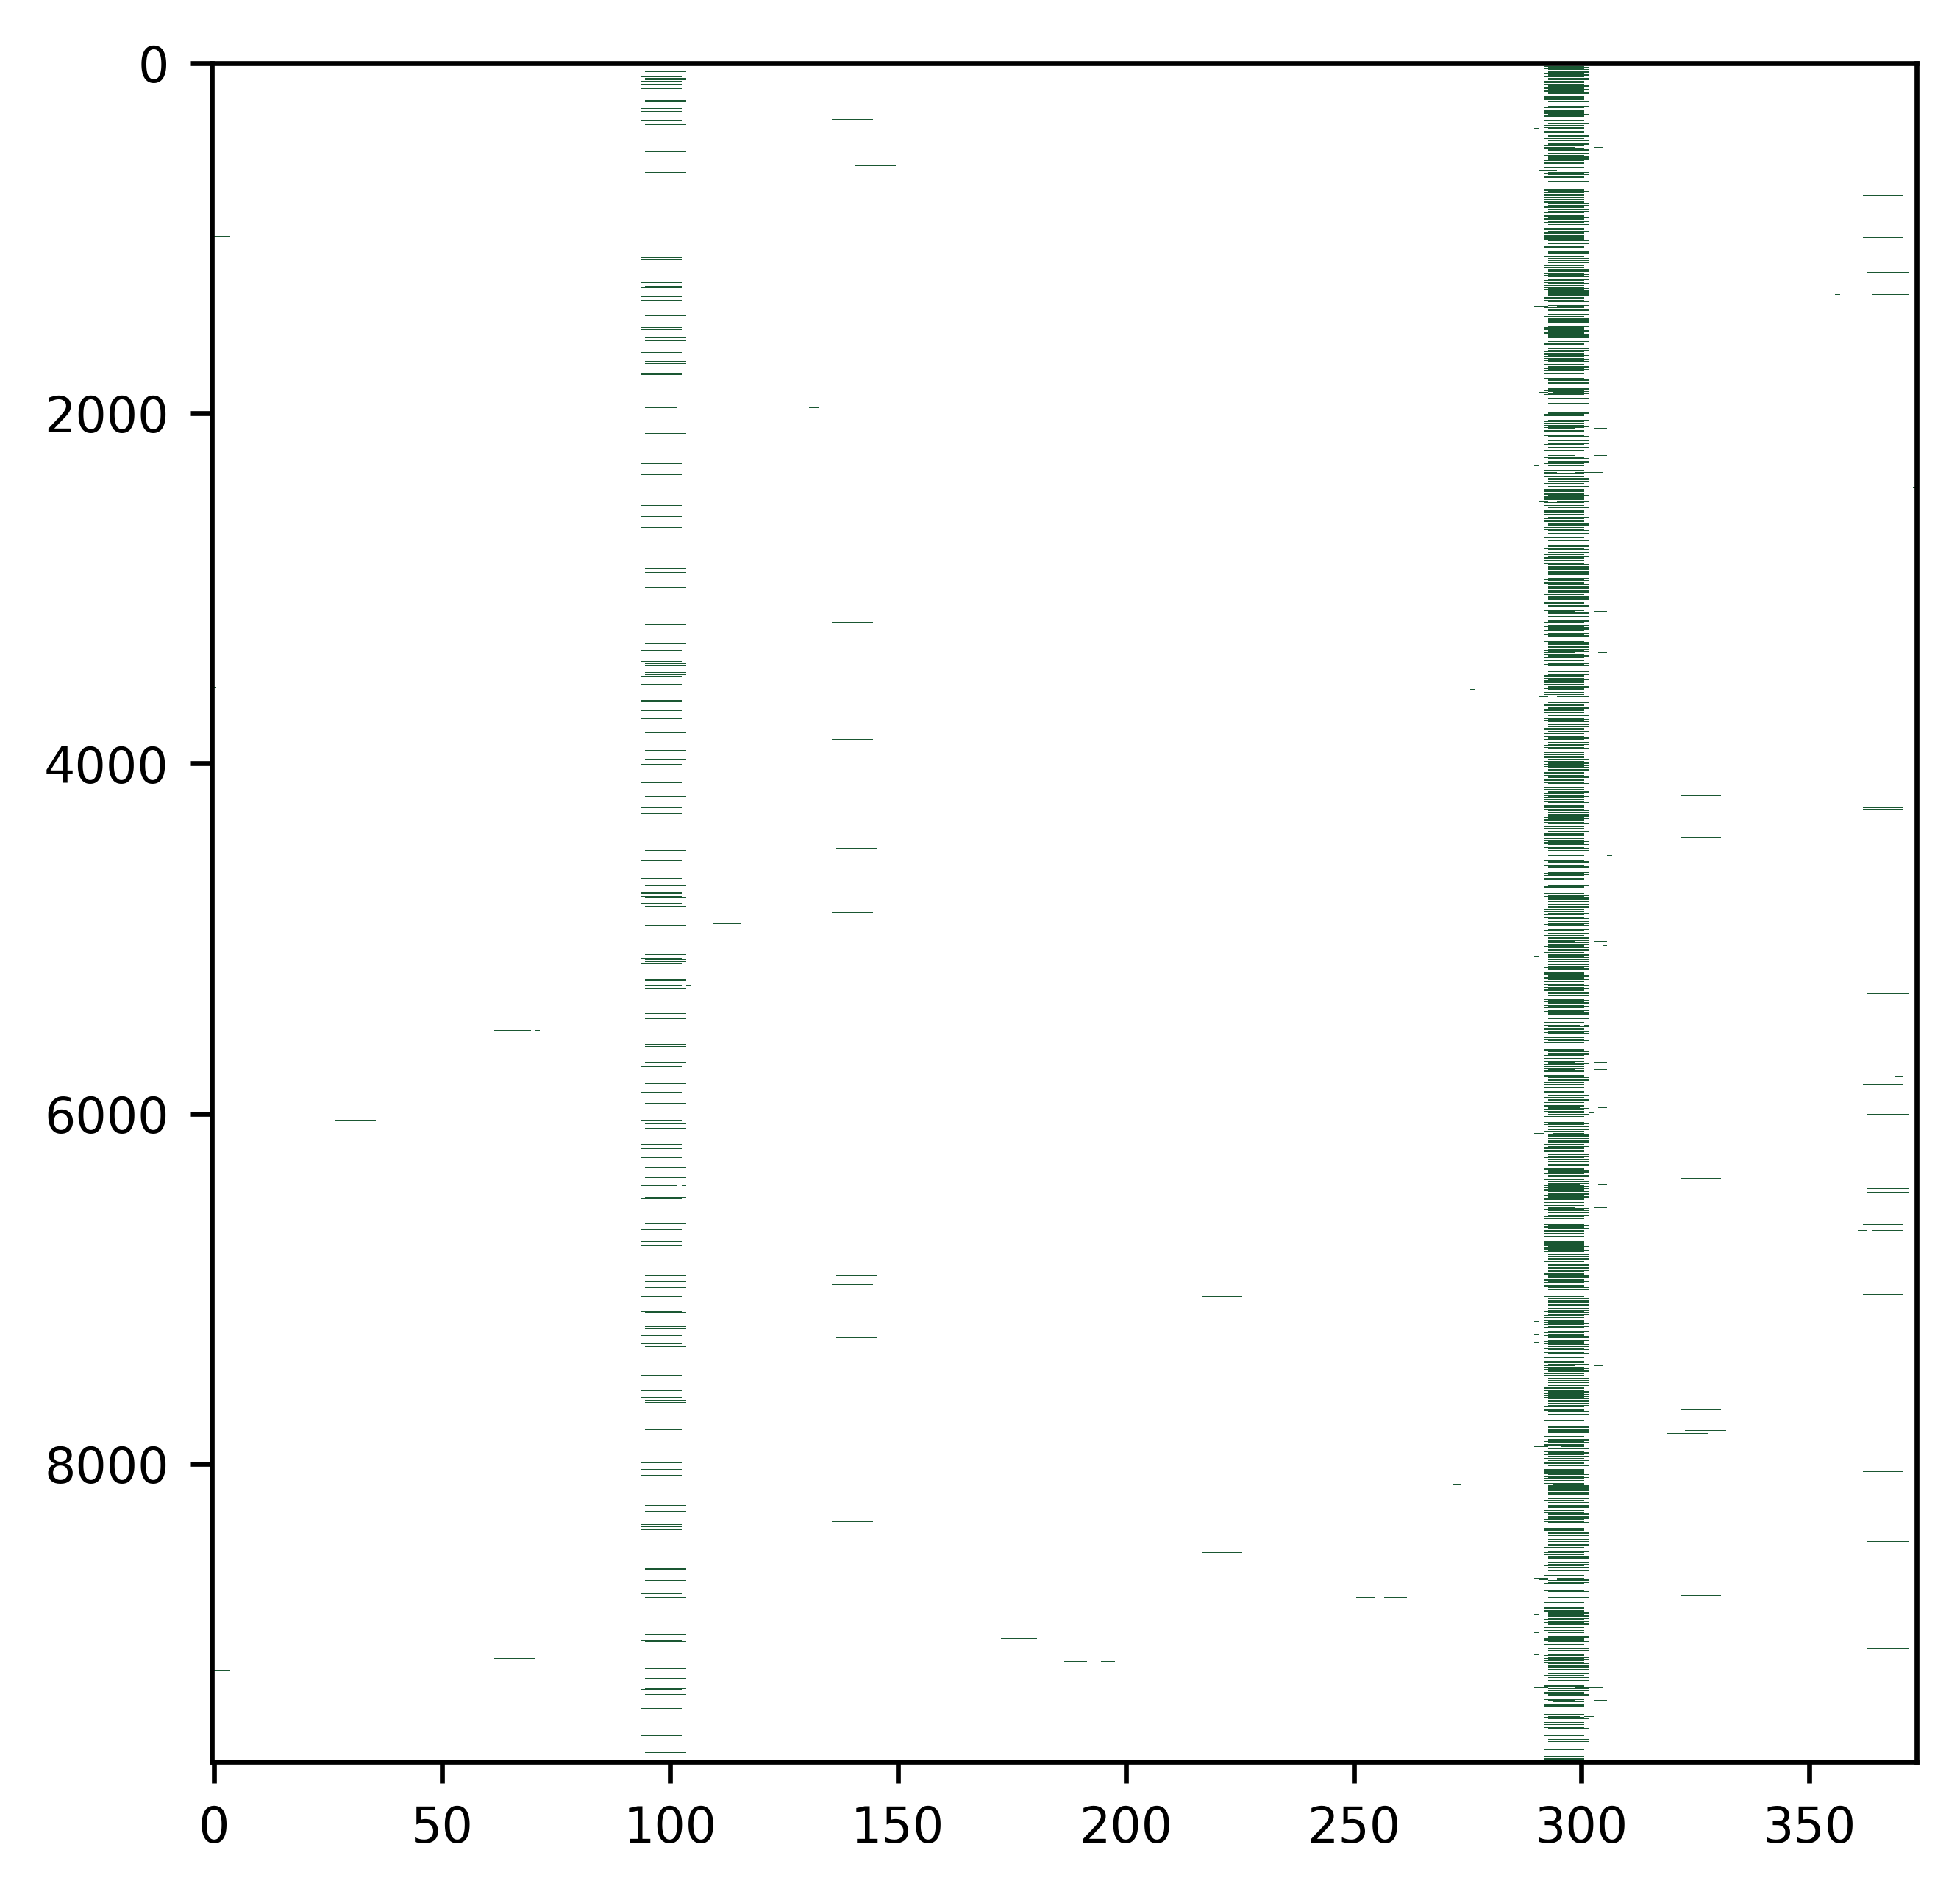

In [ ]:
plots.plot(data = [output_matrix], heatmap_color=['Greens'], vlim = [[0,0.1]], opacity = 0.9)

## map_and_overlay() PIPELINE IN DETAIL

In [5]:
from ma_mapper import extract_bed

Extract TE coordinates from alignment fasta the header for the alignment should be in >NAME::chromosome:start-stop(strand) format

In [6]:
alignment_matrix, alignment_coordinate, filters  = mapper.parse_and_filter(alignment_file=alignment_filepath, preprocess_out=True)

2025-03-19 06:20:49,671 INFO: parse alignment


In [7]:
alignment_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
alignment_coordinate

chrom      start        end        name  score strand  original_order
0      chr1     119563     119944     THE1C_0     20      -               0
1      chr1     296133     296514     THE1C_1     20      -               1
2      chr1     710552     710933     THE1C_2     20      -               2
3     chr19     181416     181797  THE1C_3502     20      -               3
4      chr9  138295330  138295711  THE1C_9041     20      +               4
...     ...        ...        ...         ...    ...    ...             ...
9784   chr2  224734778  224734901  THE1C_4351     20      -            9784
9785   chrX  139157368  139157702  THE1C_9584     20      +            9785
9786   chrX    1159464    1159569  THE1C_9045     20      -            9786
9787   chrY    1159464    1159569  THE1C_9697     20      -            9787
9788   chr2  156425872  156425923  THE1C_4107     20      -            9788

[9789 rows x 7 columns]

In [9]:
filters

[array([ True,  True,  True, ..., False, False, False]),
 array([False, False, False, ..., False, False, False])]

Then use alignment coordinate to extract genomewide data

In [10]:
output_matrix=extract_bed.bed_io(coordinate_table=alignment_coordinate, bed=genomewide_data_filepath)

2025-03-19 06:24:50,487 INFO: extract from bed file: /rds/project/rds-XrHDlpCeVDg/users/pakkanan/data/resource/annotation/homer_known_motif_hg38/AP-1(bZIP).bed
2025-03-19 06:25:19,495 INFO: done, returning bed_out as object


Filter coordinate table (exclude rows with content lower than a set threshold)

In [11]:
row_filter, col_filter = filters
alignment_coordinate_filtered=alignment_coordinate.iloc[row_filter]

overlay/map extracted data matrix onto alignment matrix and filter rows and columns 

In [13]:
output_matrix_filtered = mapper.map_data(extracted_data=output_matrix, alignment_matrix= alignment_matrix, filter=filters)

2025-03-19 06:26:23,378 INFO: {<class 'numpy.float64'>}
2025-03-19 06:26:23,379 INFO: nested_data:False


Visualize the extracted data

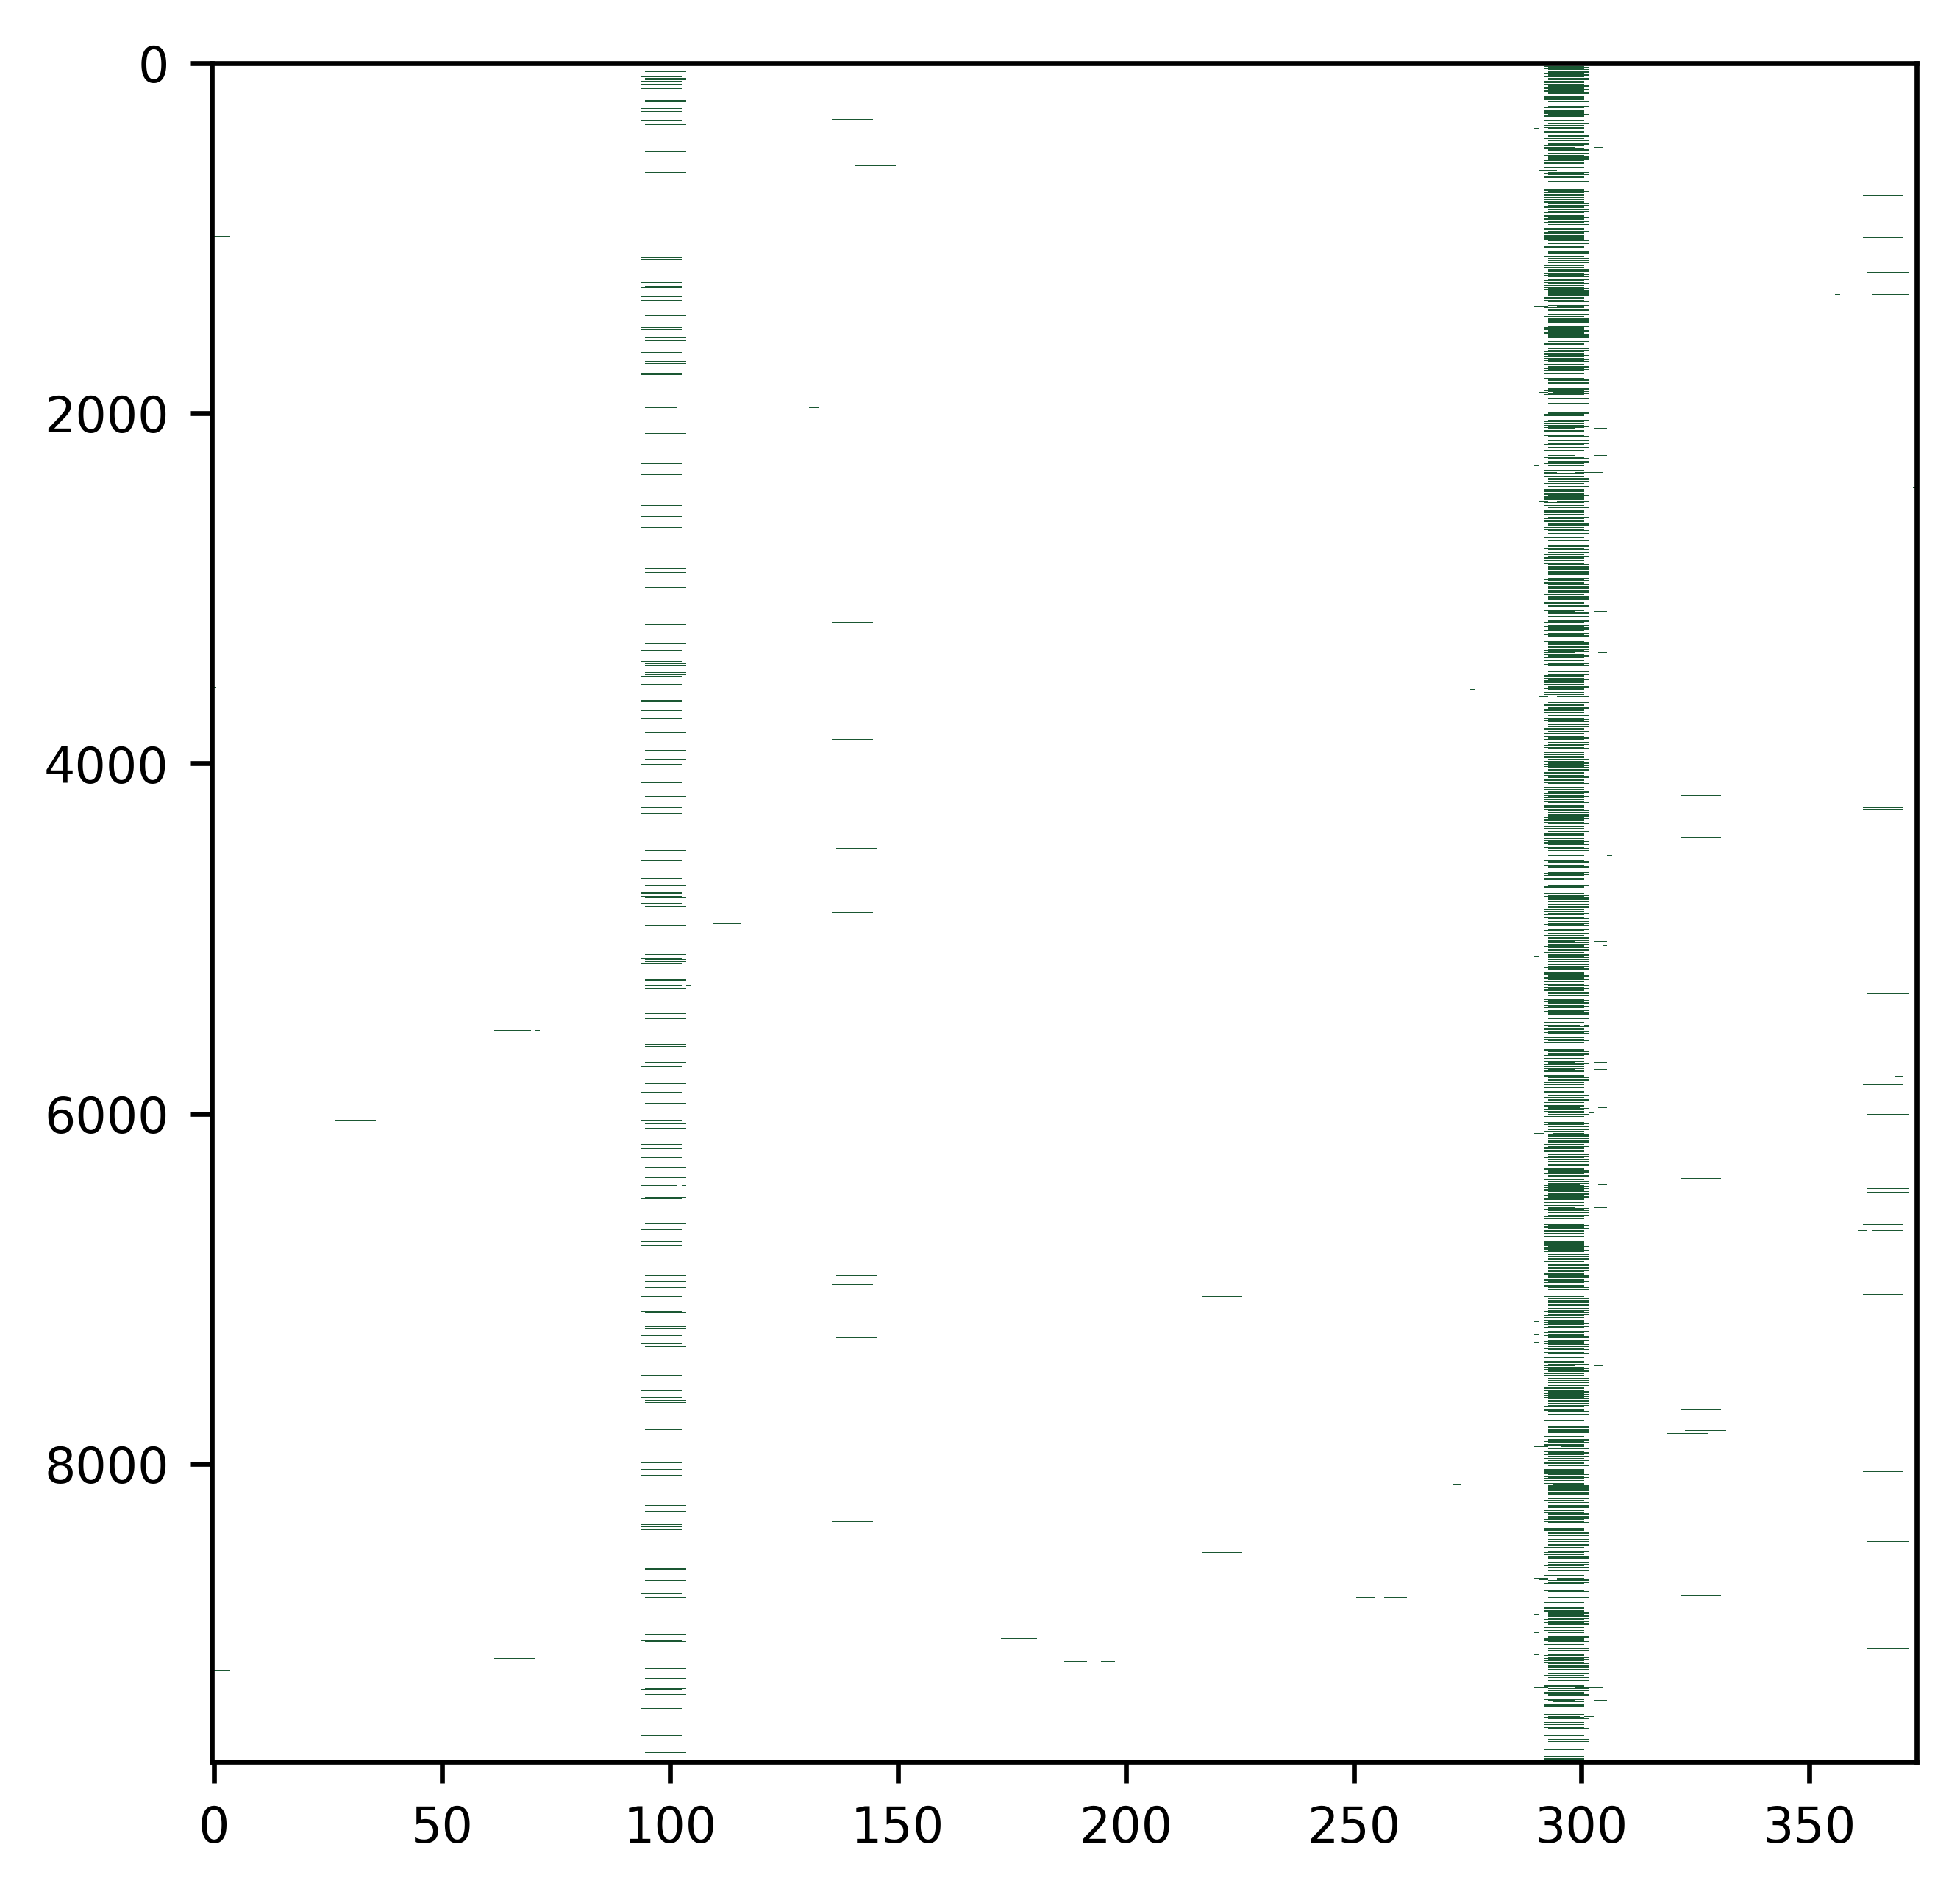

In [14]:
plots.plot(data = [output_matrix_filtered], heatmap_color=['Greens'], vlim = [[0,0.1]], opacity = 0.9)

It is possible to extend data extraction beyond the input coordinates by using extension_length argument. However the extended parts will be extracted as is, no alignment

Normal plot

2025-03-19 06:30:31,482 INFO: parse alignment
2025-03-19 06:30:39,864 INFO: done, returning bigwig_out as object
2025-03-19 06:30:40,114 INFO: {<class 'numpy.float32'>}
2025-03-19 06:30:40,115 INFO: nested_data:False


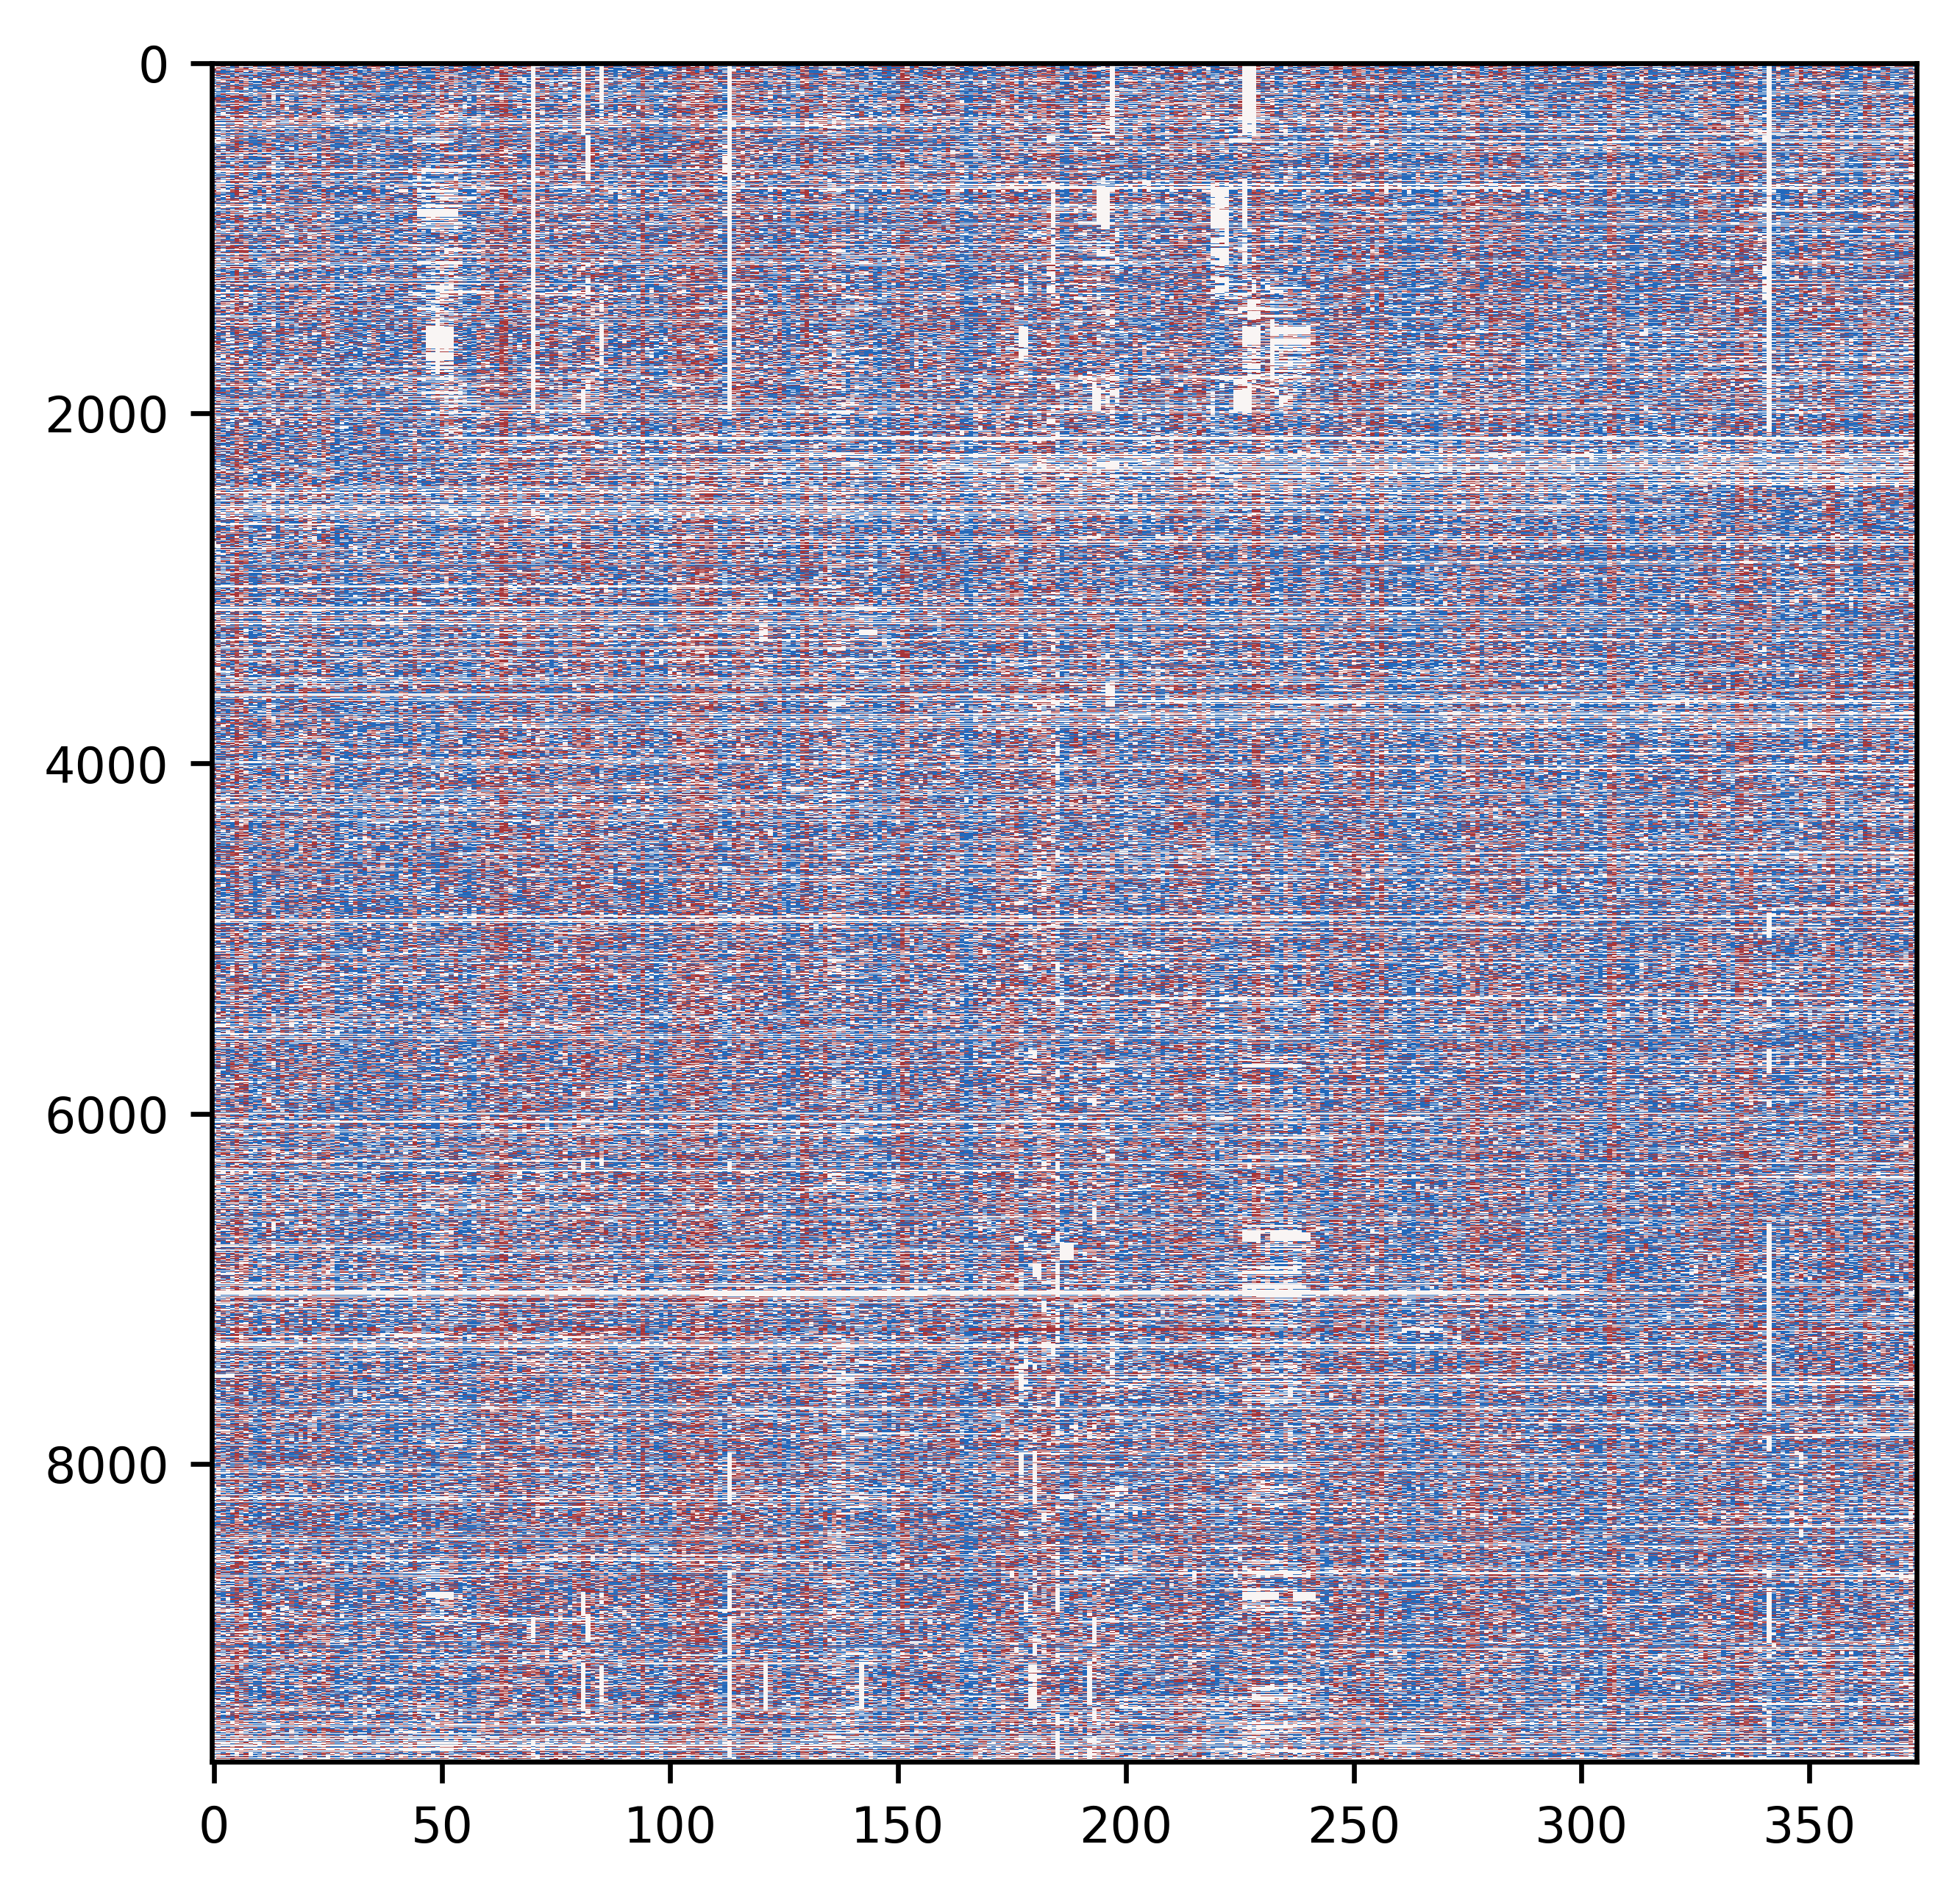

In [18]:
phyloP_data_filepath = '/rds/project/rds-XrHDlpCeVDg/users/pakkanan/data/resource/UCSC_phyloP_track/hg38.phyloP447way.bw'
phyloP_matrix=mapper.map_and_overlay(alignment_filepath, phyloP_data_filepath,data_format='bigwig')
plots.plot(data=[phyloP_matrix], heatmap_color=[custom_cmap.vlag_r_mpl], vlim =[[-0.5,0.5]])

Extended plot

2025-03-19 06:31:24,083 INFO: parse alignment
2025-03-19 06:31:32,486 INFO: done, returning bigwig_out as object
2025-03-19 06:31:32,731 INFO: {<class 'numpy.float32'>}
2025-03-19 06:31:32,732 INFO: nested_data:False
2025-03-19 06:31:36,108 INFO: done, returning bigwig_out as object
2025-03-19 06:31:39,099 INFO: done, returning bigwig_out as object


(9789, 8) 9699 9699


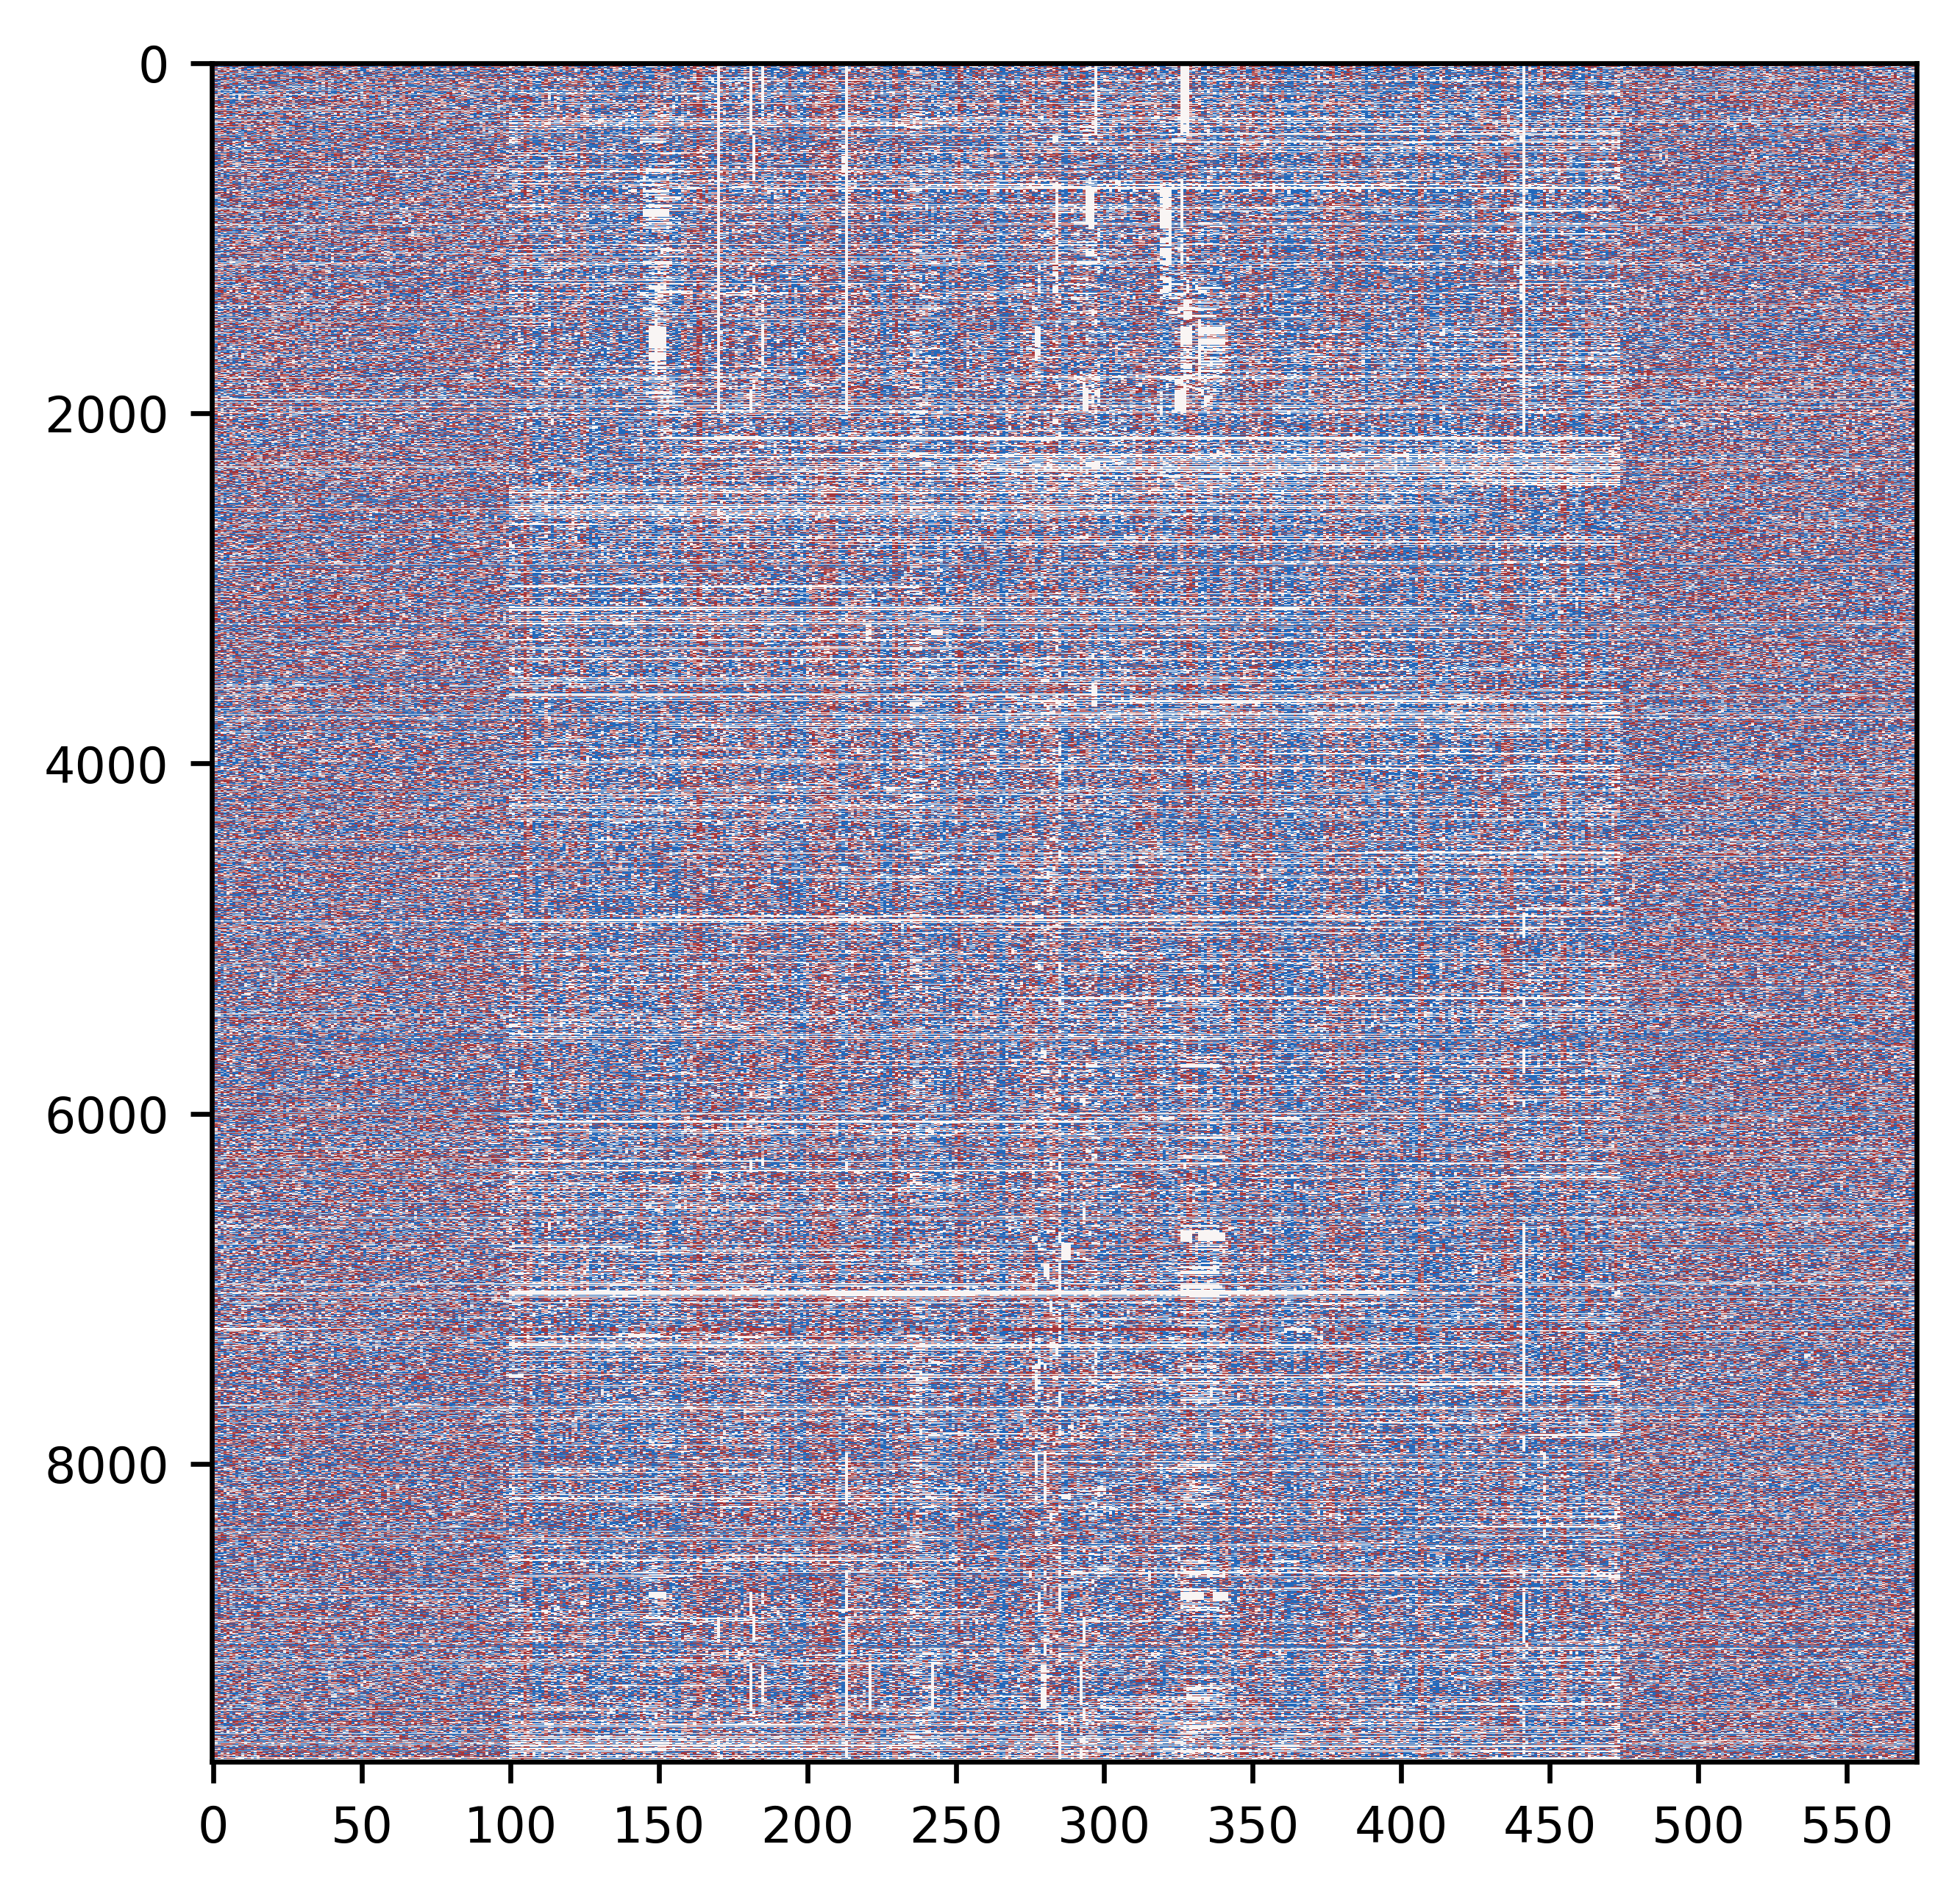

In [19]:
phyloP_matrix_extended=mapper.map_and_overlay(alignment_filepath, phyloP_data_filepath,data_format='bigwig', extension_length=100)
plots.plot(data=[phyloP_matrix_extended], heatmap_color=[custom_cmap.vlag_r_mpl], vlim =[[-0.5,0.5]])